# Data Science Project: Predicting Employee Churn

### employees leaving an organization over a specific period. 

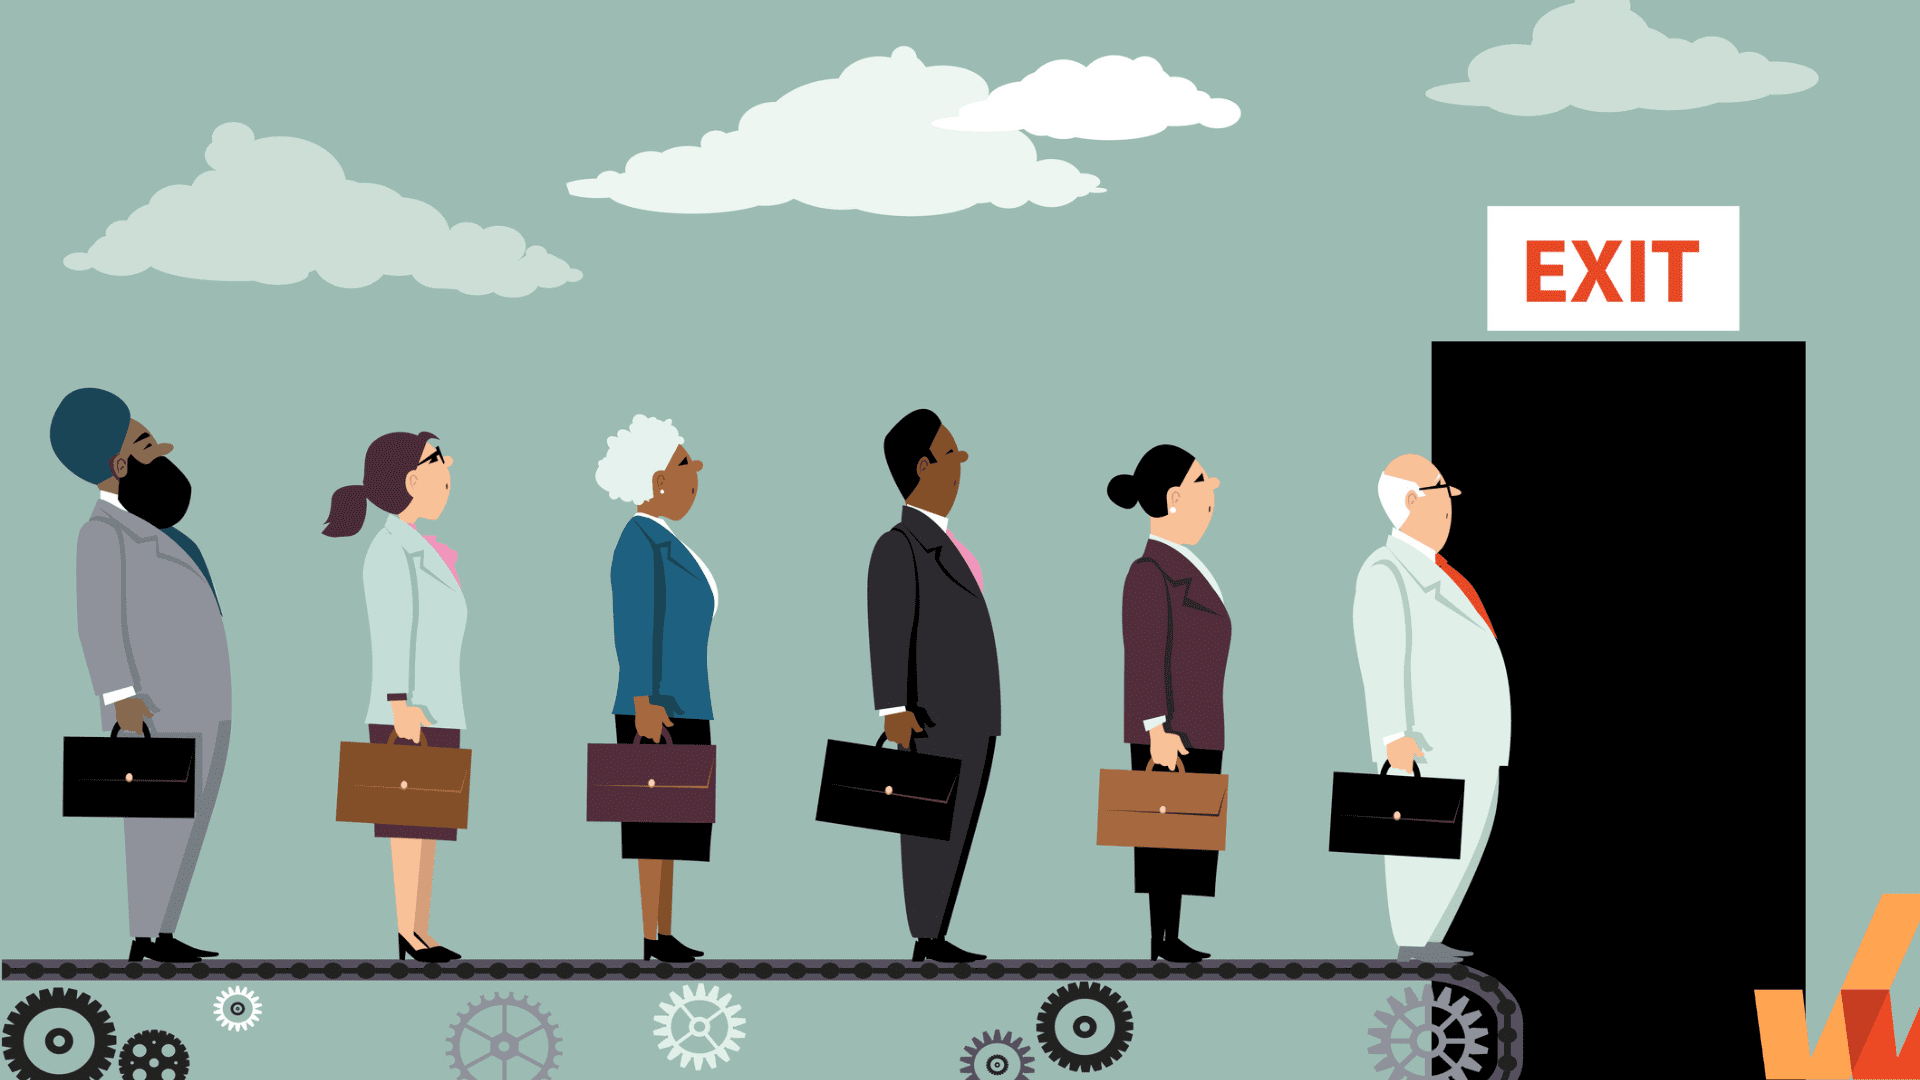

## About the data set


The dataset contains information about the employee leaving the company. It contains 14999 records including 9 features and 1 output column i.e. target variable. The aim is to build a predictive model that can accurately classify whether the employee  is likely to leave or the employee is likely to stay in the company. 

### Below is a brief information about each columns of the dataset:


satisfaction_level: Employee satisfaction level (ranges from 0 to 1).

last_evaluation: Last evaluation score of the employee (ranges from 0 to 1).

number_project: Number of projects the employee has worked on.

average_montly_hours: Average monthly hours the employee has worked.

time_spend_company: Number of years the employee has spent in the company.

Work_accident: Whether the employee has had a work accident (0 for No, 1 for Yes).

left: Whether the employee has left the company (0 for No, 1 for Yes).

promotion_last_5years: Whether the employee was promoted in the last 5 years (0 for No, 1 for Yes).

Departments: Department in which the employee works.

salary: Salary level of the employee (low, medium, high).

The Target variable for this project is "left"

### Purpose : 

By analyzing historical data and training machine learning algorithms like logistic regression, decision tree, and random forest on this data, we can create predictive models that help businesses identify potential churn risks early. This allows companies to take proactive measures, such as improving working conditions, offering promotions, or addressing dissatisfaction, to retain valuable employees and reduce turnover rates.

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


# Load the data

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\archive (5)\HR_Dataset.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# Checking columns

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [4]:
df.rename(columns={'Departments ':'Departments'},inplace=True)

In [5]:
# Lets check the number of rows and columns in the data set

df.shape

(14999, 10)

In [6]:
# Checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Checking for Summary statistics.

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check Null Values In The Dataset

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

### Checking Duplicate Values

In [9]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df.drop_duplicates(keep = 'first',inplace = True)

In [11]:
df.shape

(11991, 10)

In [12]:
14999 - 11991

3008

## Checking Unique Values

In [13]:
df.Departments.unique() 

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
df.promotion_last_5years.unique()

array([0, 1], dtype=int64)

In [16]:
df.left.unique()

array([1, 0], dtype=int64)

In [17]:
df.number_project.unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

# Analyzing numerical features

Featuer Name = satisfaction_level


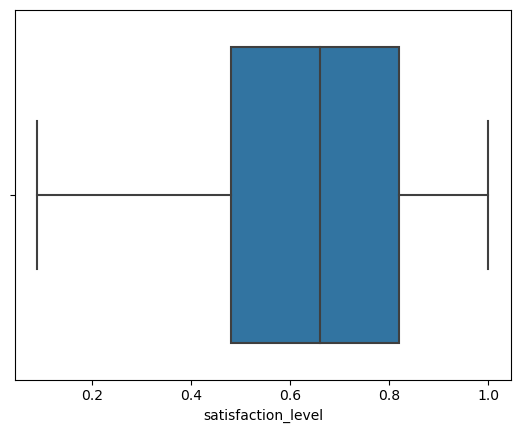

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

Featuer Name = last_evaluation


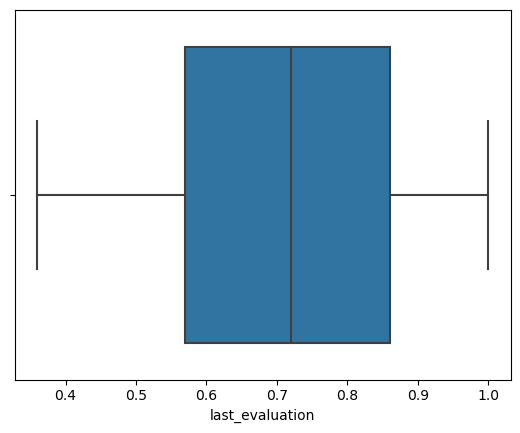

count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64

Featuer Name = number_project


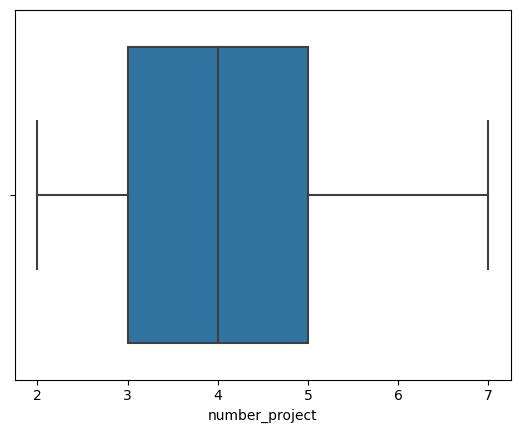

count    11991.000000
mean         3.802852
std          1.163238
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

Featuer Name = average_montly_hours


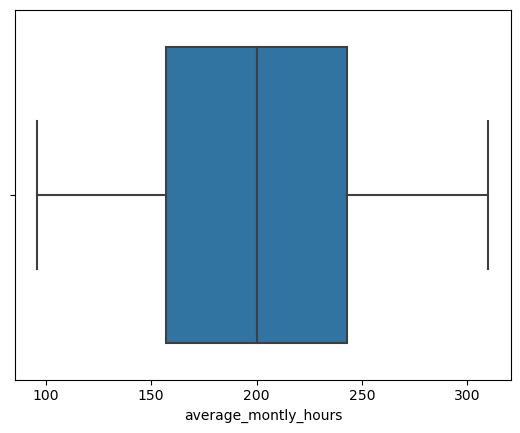

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

Featuer Name = time_spend_company


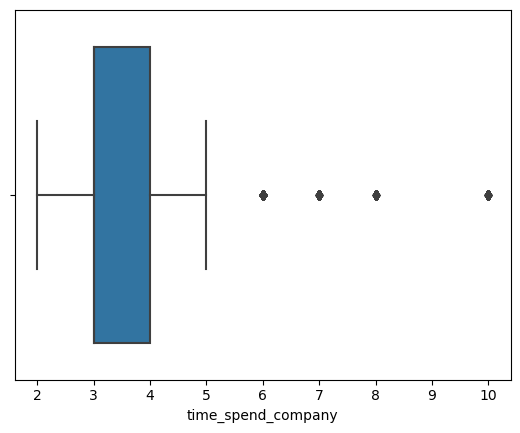

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

Featuer Name = Work_accident


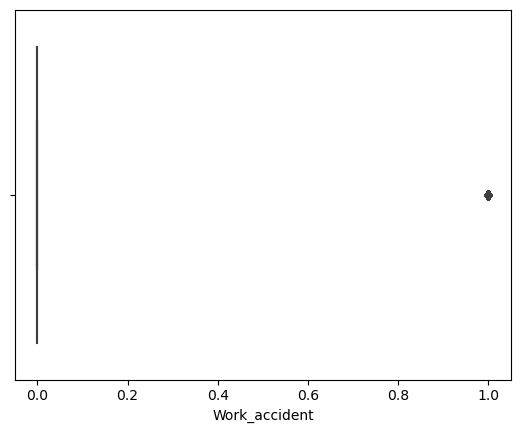

count    11991.000000
mean         0.154282
std          0.361234
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64

Featuer Name = left


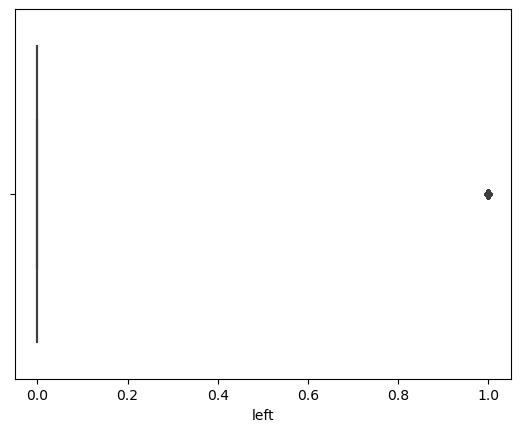

count    11991.000000
mean         0.166041
std          0.372133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

Featuer Name = promotion_last_5years


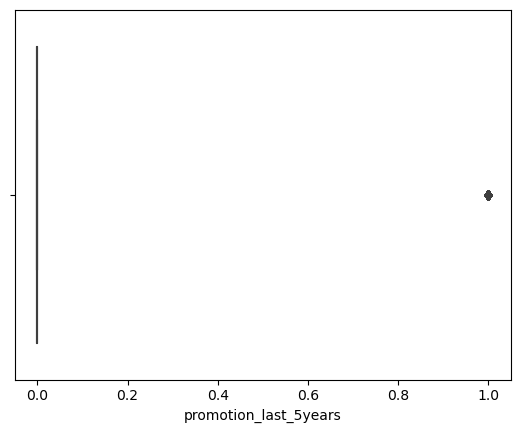

count    11991.000000
mean         0.016929
std          0.129012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_last_5years, dtype: float64

In [18]:
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']

for i in num_cols:
    print(f'Featuer Name = {i}')
    sns.boxplot(x = df[i])
    plt.show()
    display(df[i].describe())

# Analyzing for Categorical features

In [19]:
cat_cols = ['Departments', 'salary']

for i in cat_cols:
    print(df[i].value_counts())
    print(f'There are totaly {df[i].nunique()} unique {i}')
    print()

Departments
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64
There are totaly 10 unique Departments

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64
There are totaly 3 unique salary



# Insights

# Relationship between Features and left

In this section, we analyze relationship between different features with respect to left (employees). We also plot different kinds of diagrams to visualize our data and findings.

In [20]:
# left = 1
# Not_Left = 0

In [21]:
df.left.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [22]:
df.left.value_counts(normalize=True)*100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

<Axes: xlabel='left', ylabel='count'>

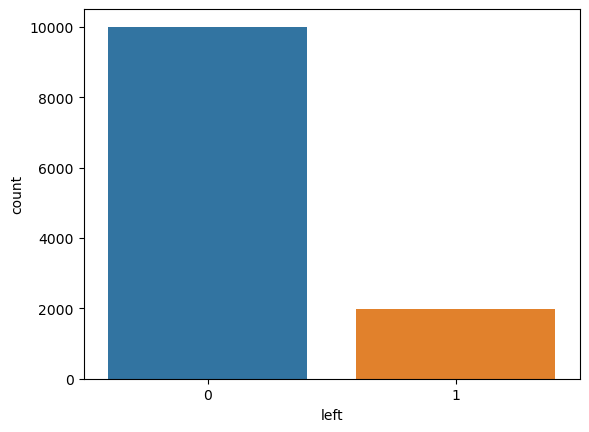

In [23]:
sns.countplot(x = df.left)

10000 employees stayed, which accounts for about 83.4% of the total employee count. Similarly, 1991 employees left, which accounts for about 16.6%.

## salary vs left

In [24]:
df.salary.value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [25]:
df.groupby('salary').left.value_counts()

salary  left
high    0        942
        1         48
low     0       4566
        1       1174
medium  0       4492
        1        769
Name: count, dtype: int64

In [26]:
df[['salary','left']].groupby(['salary']).mean()

,left
salary,
high,0.048485
low,0.204530
medium,0.146170


In [27]:
df.groupby('salary')['left'].mean()*100

salary
high       4.848485
low       20.452962
medium    14.616993
Name: left, dtype: float64

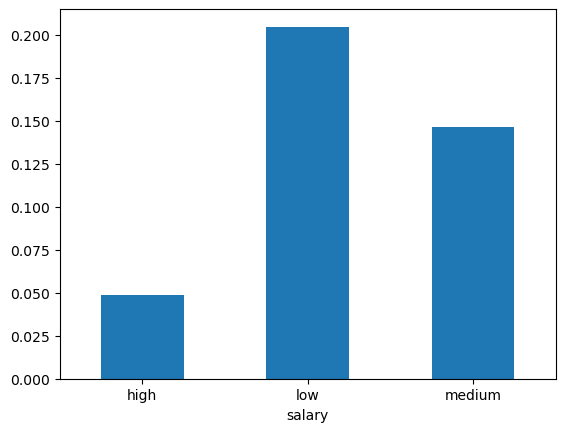

In [28]:
df.groupby('salary')['left'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Low Salaried employees has left the company most, next was medium salaried as compared to high salaried.

## Employees in each Department

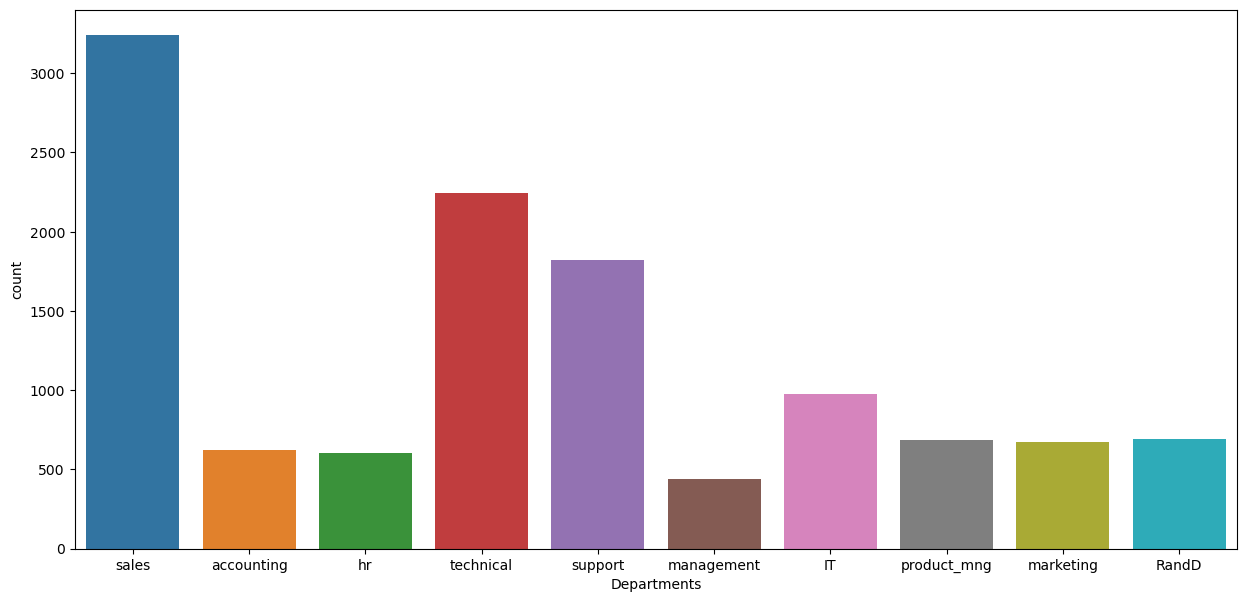

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='Departments',data=df)
plt.show()

Sales Department has got more employees, next comes technical and Support departments.

## Departments vs left

In [30]:
df.Departments.value_counts()

Departments
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [31]:
df.groupby('Departments').left.value_counts()

Departments  left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
Name: count, dtype: int64

In [32]:
df.groupby('Departments')[['left']].mean()

,left
Departments,
IT,0.161885
RandD,0.122478
accounting,0.175523
hr,0.188020
management,0.119266
marketing,0.166419
product_mng,0.160350
sales,0.169805
support,0.171334


In [33]:
df.groupby('Departments')['left'].mean()*100

Departments
IT             16.188525
RandD          12.247839
accounting     17.552335
hr             18.801997
management     11.926606
marketing      16.641902
product_mng    16.034985
sales          16.980550
support        17.133443
technical      17.379679
Name: left, dtype: float64

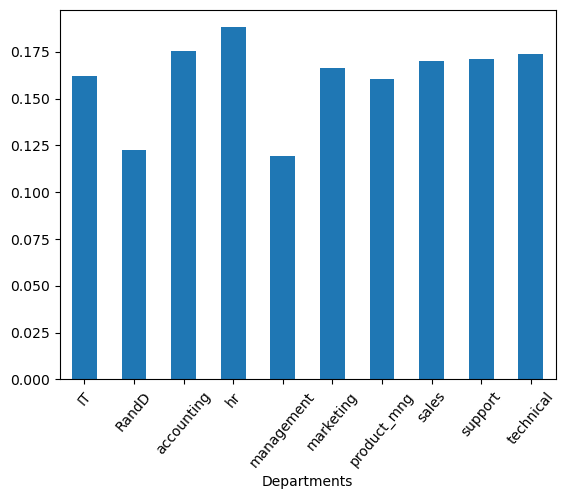

In [34]:
df.groupby('Departments')['left'].mean().plot(kind='bar')
plt.xticks(rotation=50)
plt.show()

hr Department employees has left the company most, next was accounting, technical, support and sales so on.

## promotion_last_5years vs left

In [35]:
# promotion_last_5years = 1
# No promotion_last_5years = 0

In [36]:
df.promotion_last_5years.value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [37]:
df.groupby('promotion_last_5years').left.value_counts()

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: count, dtype: int64

In [38]:
df.groupby('promotion_last_5years')[['left']].mean()

,left
promotion_last_5years,
0,0.168222
1,0.039409


In [39]:
df.groupby('promotion_last_5years')['left'].mean()*100

promotion_last_5years
0    16.822192
1     3.940887
Name: left, dtype: float64

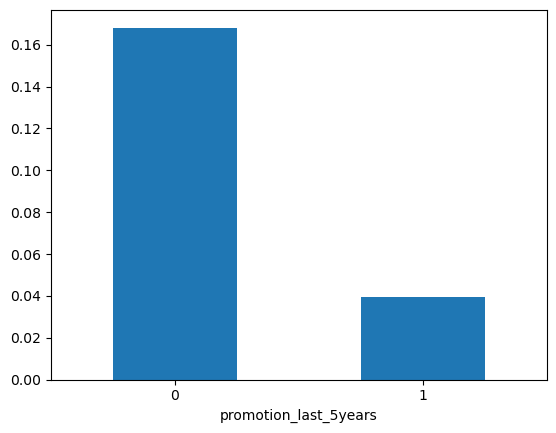

In [40]:
df.groupby('promotion_last_5years')['left'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Most of employees have left the company most who did not get promotion from last 5 years than those employees who got promoted since last 5 years.

## Work_accident vs left

In [41]:
# Work_accident = 1
# No Work_accident = 0

In [42]:
df.Work_accident.value_counts()

Work_accident
0    10141
1     1850
Name: count, dtype: int64

In [43]:
df.groupby('Work_accident').left.value_counts()

Work_accident  left
0              0       8255
               1       1886
1              0       1745
               1        105
Name: count, dtype: int64

In [44]:
df.groupby('Work_accident')[['left']].mean()

,left
Work_accident,
0,0.185978
1,0.056757


In [45]:
df.groupby('Work_accident')['left'].mean()*100

Work_accident
0    18.597771
1     5.675676
Name: left, dtype: float64

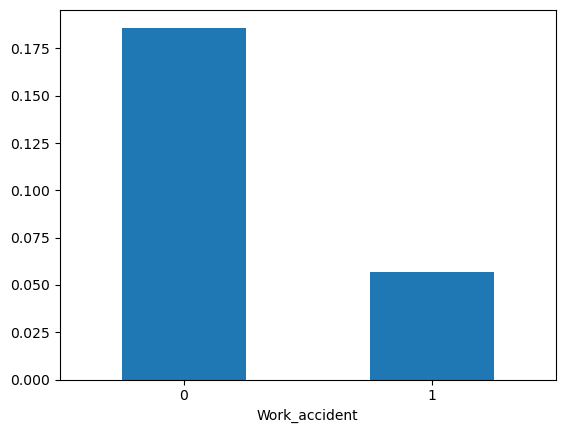

In [46]:
df.groupby('Work_accident')['left'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Most of employees have left the company most who had no accidents during work.

## number_project vs left

In [47]:
df.number_project.value_counts()

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

In [48]:
df.groupby('number_project').left.value_counts()

number_project  left
2               1        857
                0        725
3               0       3482
                1         38
4               0       3448
                1        237
5               0       1890
                1        343
6               0        455
                1        371
7               1        145
Name: count, dtype: int64

In [49]:
df[['number_project', 'left']].groupby(['number_project'], as_index=False).mean()

,number_project,left
0,2,0.541719
1,3,0.010795
2,4,0.064315
3,5,0.153605
4,6,0.449153
5,7,1.000000


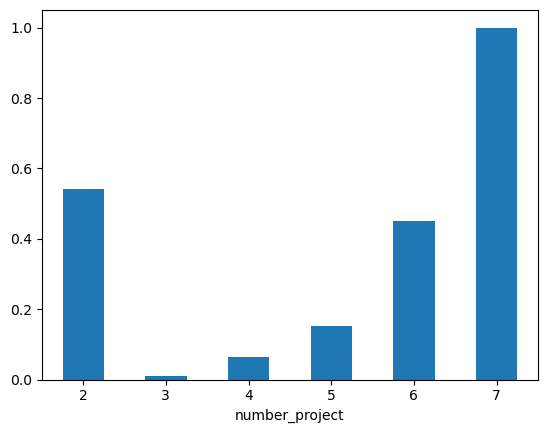

In [50]:
df.groupby('number_project')['left'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Most of employees have left the company who completed 7 projects, next was employess with 2 projects.

## satisfaction_level vs left

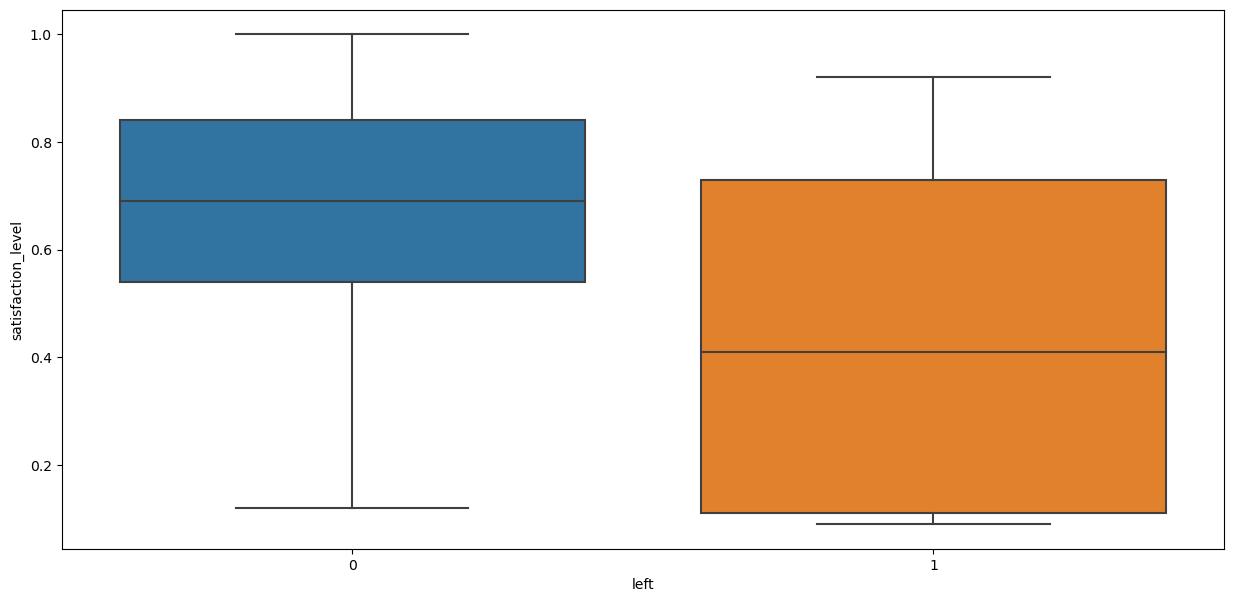

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(x="left", y= "satisfaction_level", data=df)
plt.show()

## last_evaluation vs left

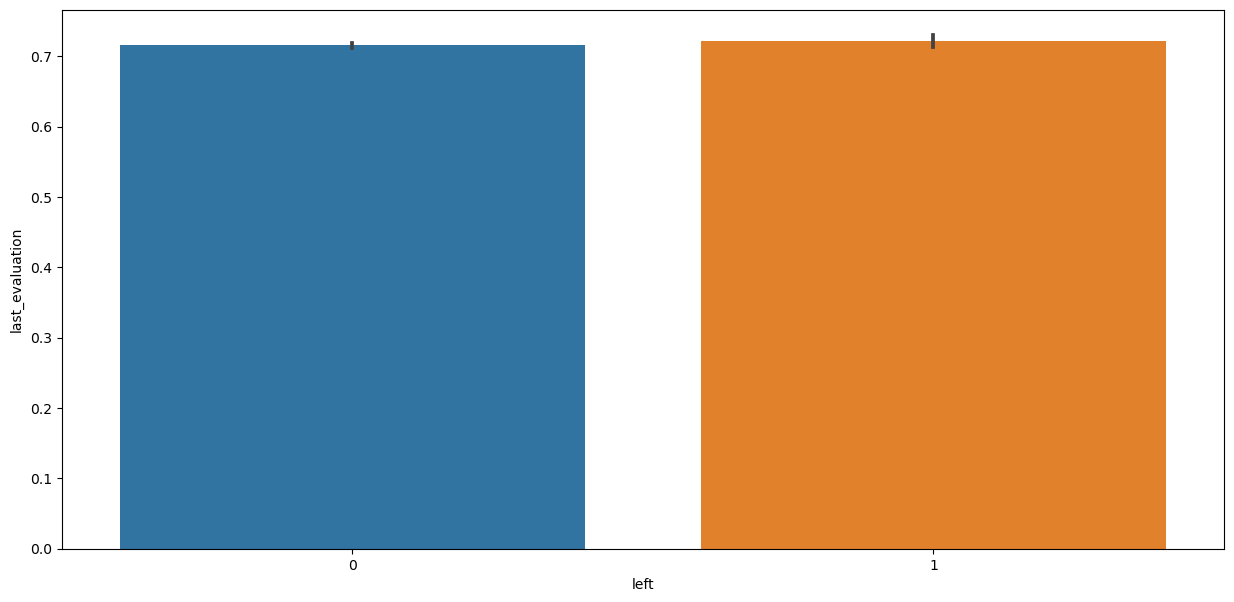

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(x="left", y= "last_evaluation", data=df)
plt.show()

In [53]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


## Now will perform some encoding technique

### Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Departments'] = le.fit_transform(df['Departments'])
df['salary'] = le.fit_transform(df['salary'])
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
6,0.10,0.77,6,247,4,0,1,0,7,1
7,0.92,0.85,5,259,5,0,1,0,7,1
8,0.89,1.00,5,224,5,0,1,0,7,1
9,0.42,0.53,2,142,3,0,1,0,7,1


In [55]:
# Salary

# low = 1
# medium = 2
# high = 3

In [56]:
# Departments

# 0 = IT 
# 1 = RandD   
# 2 = accounting        
# 3 = hr        
# 4 = management       
# 5 = marketing       
# 6 = product_mng        
# 7 = Sales   
# 8 = support        
# 9 = technical                           

In [57]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

## Correlating Features

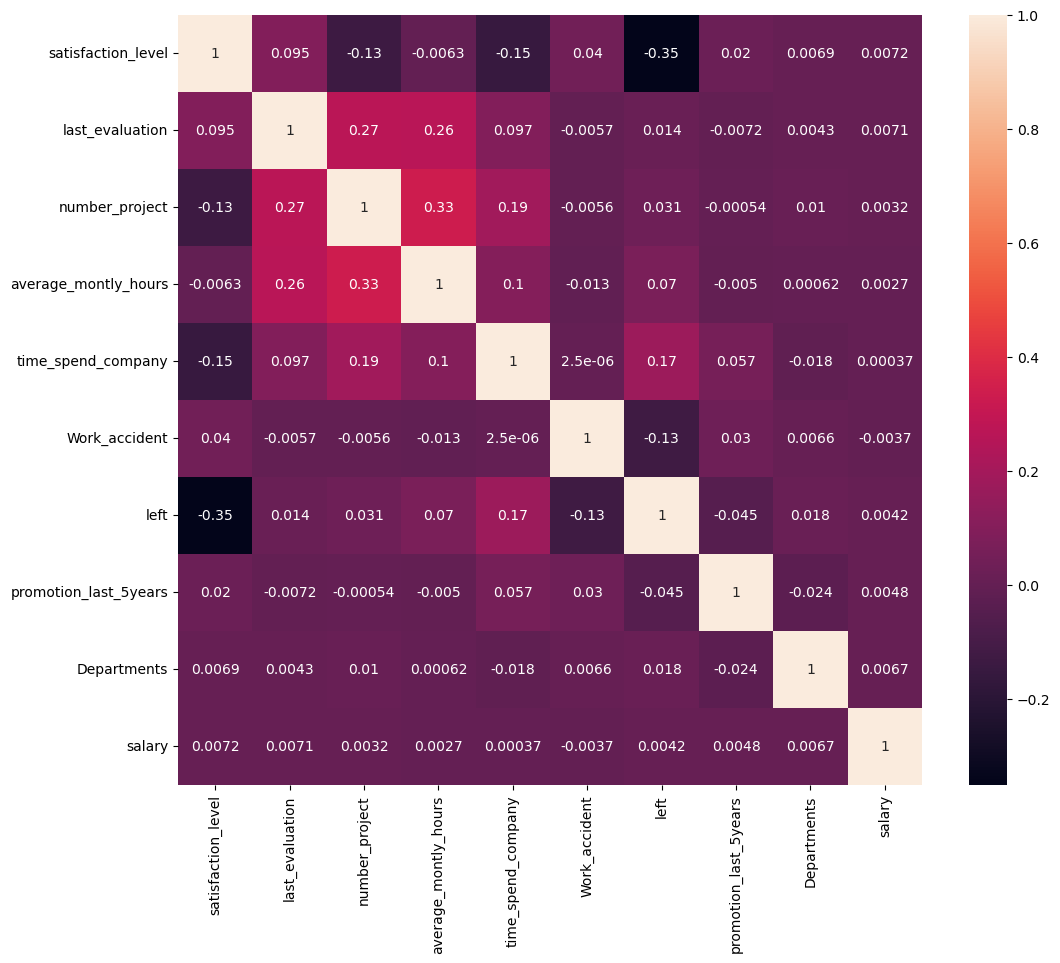

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot = True)
plt.show()

## Dividing into target variable and independent variable

In [59]:
X = df.drop(['left'],axis=1)  
y = df['left'] 

## Splitting the dataset

In [60]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0
11996,0.74,0.95,5,266,10,0,1,4,0
11997,0.85,0.54,3,185,10,0,1,4,0
11998,0.33,0.65,3,172,10,0,1,5,0


In [61]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

## Normalize the data

In [62]:
from sklearn.preprocessing import StandardScaler

# create a scalar object
scaler = StandardScaler()

# fit the scalar to the data and transform the data
X_scaled = scaler.fit_transform(X)

In [63]:
X_scaled

array([[-1.03566801, -1.10899046, -1.54992118, ..., -0.13122844,
         0.38940495, -0.56713086],
       [ 0.70663718,  0.85137984,  1.02919412, ..., -0.13122844,
         0.38940495,  1.02511128],
       [-2.15572134,  0.97019016,  2.74860432, ..., -0.13122844,
         0.38940495,  1.02511128],
       ...,
       [ 0.91405447, -1.0495853 , -0.69021608, ...,  7.62029957,
        -0.64546978, -2.15937301],
       [-1.24308529, -0.39612853, -0.69021608, ...,  7.62029957,
        -0.30051154, -2.15937301],
       [-0.53786652,  0.07911275,  0.16948902, ..., -0.13122844,
        -2.02530276, -0.56713086]])

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [65]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8393, 9) (3598, 9) (8393,) (3598,)


## Train the model

# Logistic Regression Model

In [66]:
# create the lr model
lr = LogisticRegression()

# train the model on training data
lr.fit(X_train,y_train)

LogisticRegression()

In [67]:
# predict the target variable on test data
y_pred = lr.predict(X_test)

In [68]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
y_test

397      1
3107     0
9331     0
357      1
1326     1
        ..
10403    0
9326     0
3555     0
3536     0
11308    0
Name: left, Length: 3598, dtype: int64

In [70]:
y_proba = lr.predict_proba(X_test)[:, 1]

In [71]:
y_proba

array([0.64058103, 0.11889791, 0.06330986, ..., 0.09276118, 0.75483523,
       0.07455341])

## evaluate the model

In [72]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report


Logistic Regression :
Accuracy: 0.8315730961645359
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2995
           1       0.49      0.20      0.29       603

    accuracy                           0.83      3598
   macro avg       0.68      0.58      0.60      3598
weighted avg       0.80      0.83      0.80      3598



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression')

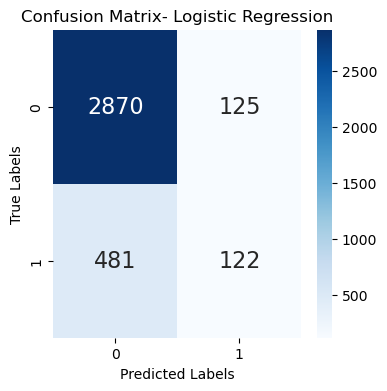

In [73]:
# Create confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Evaluate the model
print("\nLogistic Regression :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create heatmap for model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression')

# DECISON TREE MODEL

In [74]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()


Decision Tree Classifier :
Accuracy: 0.9688715953307393
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2995
           1       0.90      0.92      0.91       603

    accuracy                           0.97      3598
   macro avg       0.94      0.95      0.94      3598
weighted avg       0.97      0.97      0.97      3598



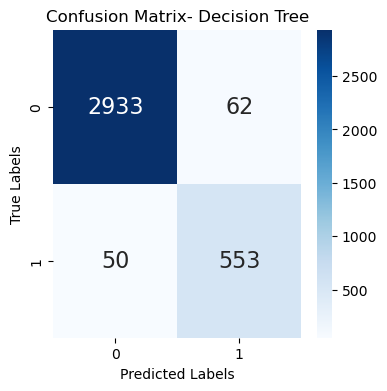

In [75]:
# Predict probabilities on the test set
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]

# Create confusion matrix for the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC-ROC score 
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_non_oversampled = roc_auc_score(y_test, y_proba)

# Create heatmap for the model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the model
print("\nDecision Tree Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

OBSERVATION => Accuracy is here 97% =>Its predicting TP values. =>552. PRECISION = 91%, recall = 91%.

# Random Forest classifier

In [76]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()


Random Forest Classifier :
Accuracy: 0.9833240689271817
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       0.98      0.92      0.95       603

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598



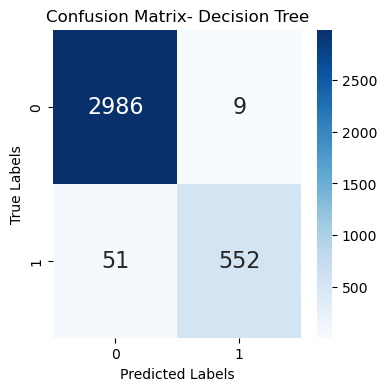

In [77]:
# Predict probabilities on test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Create confusion matrix for the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC-ROC score for the model
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Create heatmap for the model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the non-oversampled model
print("\nRandom Forest Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Outcome

Random Forest gives more accurate result as compare to others model.